# Display objects

A `striplog` depends on a hierarchy of objects. This notebook shows the objects related to display:

- [Decor](#Decor): One element from a legend — describes how to display a Rock.
- [Legend](#Legend): A set of Decors — describes how to display a set of Rocks or a Striplog.

<hr />

## Decor

In [3]:
from striplog import Decor

A Decor attaches a display style to a Rock. From the docs:

> A single display style. A Decor describes how to display a given set
    of Component properties.

> In general, you will not usually use a Decor on its own. Instead, you
    will want to use a Legend, which is just a list of Decors, and leave
    the Decors to the Legend.


We are going to need a `Component` to make a `Decor`. 'Components' represent things like rock types.

In [4]:
from striplog import Component

r = {'colour': 'grey',
     'grainsize': 'vf-f',
     'lithology': 'sand',
     'porosity': 0.123
    }

rock = Component(r)
rock

colour,grey
grainsize,vf-f
lithology,sand
porosity,0.123


In [5]:
d = {'color': '#267022',
     'component': rock,
     'width': 3
    }

decor = Decor(d)
decor

Decor({'_colour': '#267022', 'component': Component({'colour': 'grey', 'grainsize': 'vf-f', 'lithology': 'sand', 'porosity': 0.123}), 'width': 3.0, 'hatch': None})

In [6]:
from striplog import Component
r = {'colour': 'grey',
     'grainsize': 'vf-f',
     'lithology': 'sand',
     'porosity': 0.123
    }
rock = Component(r)
rock

colour,grey
grainsize,vf-f
lithology,sand
porosity,0.123


Like `Rock`s, we instantiate `Decor`s with a `dict` of properties:

In [7]:
d = {'color': '#267022',
     'component': rock,
     'width': 3
    }

decor = Decor(d)
decor

Decor({'_colour': '#267022', 'component': Component({'colour': 'grey', 'grainsize': 'vf-f', 'lithology': 'sand', 'porosity': 0.123}), 'width': 3.0, 'hatch': None})

Or instantiate with keyword parameters:

In [9]:
Decor(colour='#86f0b6',
      component=Component({'colour': 'grey', 'grainsize': 'vf-f', 'porosity': 0.123, 'lithology': 'sand'}),
      width=3.0
     )

Decor({'_colour': '#86f0b6', 'component': Component({'colour': 'grey', 'grainsize': 'vf-f', 'porosity': 0.123, 'lithology': 'sand'}), 'width': 3.0, 'hatch': None})

You can access its attributes. It has two ways to understand colour:

In [10]:
print("Hex: {}... and RGB: {}".format(decor.colour, decor.rgb))

Hex: #267022... and RGB: (38, 112, 34)


In [11]:
print(decor)

Decor({'_colour': '#267022', 'component': Component({'colour': 'grey', 'grainsize': 'vf-f', 'lithology': 'sand', 'porosity': 0.123}), 'width': 3.0, 'hatch': None})


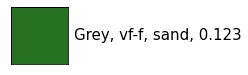

In [12]:
%matplotlib inline
decor.plot()

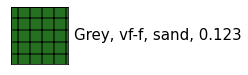

In [13]:
decor.hatch = '+'
decor.plot()

There are the standard `matplotlib` hatch patterns:

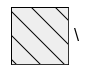

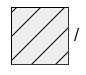

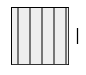

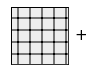

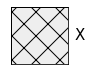

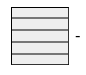

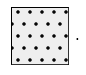

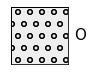

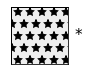

In [14]:
hatches = "\/|+x-.o*"
for h in hatches:
    Decor({'component': Component({'hatch':h}), 'hatch': h, 'colour': '#eeeeee'}).plot()

And there are some custom ones. These really need to be reconciled and implemented in a more flexible way, perhaps even going as far as a redesign of the mpl implementation.

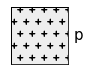

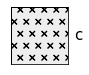

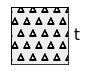

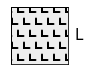

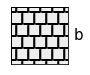

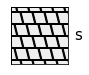

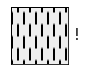

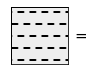

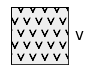

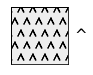

In [15]:
hatches = "pctLbs!=v^"
for h in hatches:
    Decor({'component': Component({'hatch':h}), 'hatch': h, 'colour': '#eeeeee'}).plot(fmt="{hatch}")

We can disaply hatches in a single plot for quick reference:

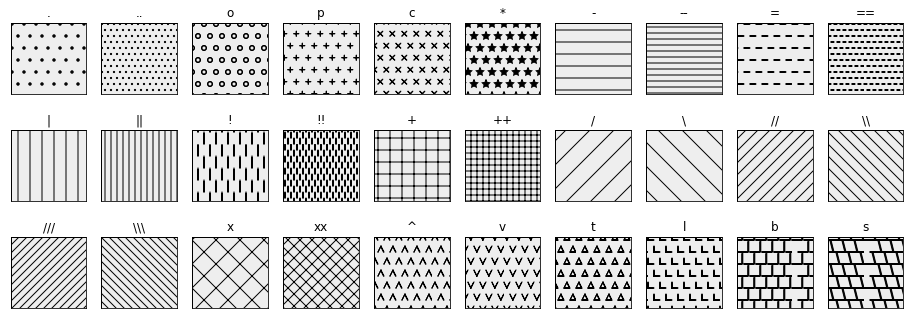

In [16]:
import matplotlib.pyplot as plt

hatches = ['.', '..', 'o', 'p', 'c', '*', '-', '--', '=', '==', '|',
            '||', '!', '!!', '+', '++', '/', '\\', '//', '\\\\', '///',
            '\\\\\\', 'x', 'xx', '^', 'v', 't', 'l', 'b', 's']

fig, axs = plt.subplots(figsize=(16,5.25), ncols=10, nrows=3)
fig.subplots_adjust(hspace=0.5)

for ax, h in zip(axs.flatten(), hatches):
    ax.set_title(h)
    Decor(colour='#eeeeee', 
          component=Component({'hatch': h}), 
          hatch=h).plot(fmt='', ax=ax)

<hr />

## Legend

> A look-up table to assist in the conversion of Components to a plot colour.

We'll define a legend in a CSV file. I can't think of a better way for now. It would be easy to make a web form to facilitate this with, for example, a colour picker. It may not be worth it, though; I imagine one would create one and then leave it alone most of the time. 

In [19]:
l = u"""colour, width, component lithology, component colour, component grainsize
#F7E9A6, 3, Sandstone, Grey, VF-F
#FF99CC, 2, Anhydrite, , 
#DBD6BC, 3, Heterolithic, Grey, 
#FF4C4A, 2, Volcanic, , 
#86F0B6, 5, Conglomerate, , 
#FF96F6, 2, Halite, , 
#F2FF42, 4, Sandstone, Grey, F-M
#DBC9BC, 3, Heterolithic, Red, 
#A68374, 2, Siltstone, Grey, 
#A657FA, 3, Dolomite, , 
#FFD073, 4, Sandstone, Red, C-M
#A6D1FF, 3, Limestone, , 
#FFDBBA, 3, Sandstone, Red, VF-F
#FFE040, 4, Sandstone, Grey, C-M
#A1655A, 2, Siltstone, Red, 
#363434, 1, Coal, , 
#664A4A, 1, Mudstone, Red, 
#666666, 1, Mudstone, Grey, """

In [20]:
from striplog import Legend

legend = Legend.from_csv(text=l)
legend[:5]

Legend(Decor({'_colour': '#f7e9a6', 'width': 3.0, 'component': Component({'lithology': 'sandstone', 'colour': 'grey', 'grainsize': 'vf-f'}), 'hatch': None})
Decor({'_colour': '#ff99cc', 'width': 2.0, 'component': Component({'lithology': 'anhydrite'}), 'hatch': None})
Decor({'_colour': '#dbd6bc', 'width': 3.0, 'component': Component({'lithology': 'heterolithic', 'colour': 'grey'}), 'hatch': None})
Decor({'_colour': '#ff4c4a', 'width': 2.0, 'component': Component({'lithology': 'volcanic'}), 'hatch': None})
Decor({'_colour': '#86f0b6', 'width': 5.0, 'component': Component({'lithology': 'conglomerate'}), 'hatch': None}))

Duplicate lithologies will result in a warning. To avoid strange results, you should fix the problem by removing duplicates.

In [21]:
l = u"""colour, component lithology
#F7E9A6, Sandstone
#F2FF42, Sandstone
#FF99CC, Anhydrite
#DBD6BC, Heterolithic 
#FF4C4A, Volcanic
#86F0B6, Conglomerate
#FFD073, Sandstone
"""

In [22]:
Legend.from_csv(text=l)

/home/matt/miniconda3/envs/welly/lib/python3.9/site-packages/striplog/legend.py:687: UserWarning: This legend contains duplicate components.
  warnings.warn(w)
/home/matt/miniconda3/envs/welly/lib/python3.9/site-packages/striplog/legend.py:687: UserWarning: This legend contains duplicate components.
  warnings.warn(w)


Legend(Decor({'_colour': '#f7e9a6', 'component': Component({'lithology': 'sandstone'}), 'width': None, 'hatch': None})
Decor({'_colour': '#f2ff42', 'component': Component({'lithology': 'sandstone'}), 'width': None, 'hatch': None})
Decor({'_colour': '#ff99cc', 'component': Component({'lithology': 'anhydrite'}), 'width': None, 'hatch': None})
Decor({'_colour': '#dbd6bc', 'component': Component({'lithology': 'heterolithic '}), 'width': None, 'hatch': None})
Decor({'_colour': '#ff4c4a', 'component': Component({'lithology': 'volcanic'}), 'width': None, 'hatch': None})
Decor({'_colour': '#86f0b6', 'component': Component({'lithology': 'conglomerate'}), 'width': None, 'hatch': None})
Decor({'_colour': '#ffd073', 'component': Component({'lithology': 'sandstone'}), 'width': None, 'hatch': None}))

We can also export a legend as CSV text:

In [23]:
print(legend.to_csv())

colour,hatch,width,component lithology,component colour,component grainsize
#f7e9a6,None,3.0,sandstone,grey,vf-f,
#ff99cc,None,2.0,anhydrite,,,
#dbd6bc,None,3.0,heterolithic,grey,,
#ff4c4a,None,2.0,volcanic,,,
#86f0b6,None,5.0,conglomerate,,,
#ff96f6,None,2.0,halite,,,
#f2ff42,None,4.0,sandstone,grey,f-m,
#dbc9bc,None,3.0,heterolithic,red,,
#a68374,None,2.0,siltstone,grey,,
#a657fa,None,3.0,dolomite,,,
#ffd073,None,4.0,sandstone,red,c-m,
#a6d1ff,None,3.0,limestone,,,
#ffdbba,None,3.0,sandstone,red,vf-f,
#ffe040,None,4.0,sandstone,grey,c-m,
#a1655a,None,2.0,siltstone,red,,
#363434,None,1.0,coal,,,
#664a4a,None,1.0,mudstone,red,,
#666666,None,1.0,mudstone,grey,,



## Builtin legends

There are several: 

    'nsdoe': Nova Scotia Dept. of Energy
    'nagmdm__6_2': USGS N. Am. Geol. Map Data Model 6.2 <<< default
    'nagmdm__6_1': USGS N. Am. Geol. Map Data Model 6.1
    'nagmdm__4_3': USGS N. Am. Geol. Map Data Model 4.3
    'sgmc': USGS State Geologic Map Compilation

In [24]:
legend = Legend.builtin('nsdoe')
legend

Legend(Decor({'_colour': '#f7e9a6', 'width': 3.0, 'component': Component({'lithology': 'sandstone', 'colour': 'grey', 'grainsize': 'vf-f'}), 'hatch': None})
Decor({'_colour': '#ff99cc', 'width': 2.0, 'component': Component({'lithology': 'anhydrite'}), 'hatch': None})
Decor({'_colour': '#dbd6bc', 'width': 3.0, 'component': Component({'lithology': 'heterolithic', 'colour': 'grey'}), 'hatch': None})
Decor({'_colour': '#ff4c4a', 'width': 2.0, 'component': Component({'lithology': 'volcanic'}), 'hatch': None})
Decor({'_colour': '#86f0b6', 'width': 5.0, 'component': Component({'lithology': 'conglomerate'}), 'hatch': None})
Decor({'_colour': '#ff96f6', 'width': 2.0, 'component': Component({'lithology': 'halite'}), 'hatch': None})
Decor({'_colour': '#f2ff42', 'width': 4.0, 'component': Component({'lithology': 'sandstone', 'colour': 'grey', 'grainsize': 'f-m'}), 'hatch': None})
Decor({'_colour': '#dbc9bc', 'width': 3.0, 'component': Component({'lithology': 'heterolithic', 'colour': 'red'}), 'hatch': None})
Decor({'_colour': '#a68374', 'width': 2.0, 'component': Component({'lithology': 'siltstone', 'colour': 'grey'}), 'hatch': None})
Decor({'_colour': '#a657fa', 'width': 3.0, 'component': Component({'lithology': 'dolomite'}), 'hatch': None})
Decor({'_colour': '#ffd073', 'width': 4.0, 'component': Component({'lithology': 'sandstone', 'colour': 'red', 'grainsize': 'c-m'}), 'hatch': None})
Decor({'_colour': '#a6d1ff', 'width': 3.0, 'component': Component({'lithology': 'limestone'}), 'hatch': None})
Decor({'_colour': '#ffdbba', 'width': 3.0, 'component': Component({'lithology': 'sandstone', 'colour': 'red', 'grainsize': 'vf-f'}), 'hatch': None})
Decor({'_colour': '#ffe040', 'width': 4.0, 'component': Component({'lithology': 'sandstone', 'colour': 'grey', 'grainsize': 'c-m'}), 'hatch': None})
Decor({'_colour': '#a1655a', 'width': 2.0, 'component': Component({'lithology': 'siltstone', 'colour': 'red'}), 'hatch': None})
Decor({'_colour': '#363434', 'width': 1.0, 'component': Component({'lithology': 'coal'}), 'hatch': None})
Decor({'_colour': '#664a4a', 'width': 1.0, 'component': Component({'lithology': 'mudstone', 'colour': 'red'}), 'hatch': None})
Decor({'_colour': '#666666', 'width': 1.0, 'component': Component({'lithology': 'mudstone', 'colour': 'grey'}), 'hatch': None}))

There is also a default legend, which you can call with `Legend.default()` (no arguments).

In [25]:
Legend.default()

Legend(Decor({'_colour': '#fdf43f', 'width': None, 'component': Component({'lithology': 'unconsolidated material'}), 'hatch': None})
Decor({'_colour': '#ffff89', 'width': None, 'component': Component({'lithology': 'alluvium'}), 'hatch': None})
Decor({'_colour': '#ffffd5', 'width': None, 'component': Component({'lithology': 'flood plain'}), 'hatch': None})
Decor({'_colour': '#fffae9', 'width': None, 'component': Component({'lithology': 'levee'}), 'hatch': None})
Decor({'_colour': '#fffac8', 'width': None, 'component': Component({'lithology': 'delta'}), 'hatch': None})
Decor({'_colour': '#ffffb7', 'width': None, 'component': Component({'lithology': 'alluvial fan'}), 'hatch': None})
Decor({'_colour': '#faee7a', 'width': None, 'component': Component({'lithology': 'alluvial terrace'}), 'hatch': None})
Decor({'_colour': '#f4efe4', 'width': None, 'component': Component({'lithology': 'lake or marine sediment'}), 'hatch': None})
Decor({'_colour': '#f1e5df', 'width': None, 'component': Component({'lithology': 'playa'}), 'hatch': None})
Decor({'_colour': '#e4d0be', 'width': None, 'component': Component({'lithology': 'mud flat'}), 'hatch': None})
Decor({'_colour': '#e4d8be', 'width': None, 'component': Component({'lithology': 'beach sand'}), 'hatch': None})
Decor({'_colour': '#fff6d9', 'width': None, 'component': Component({'lithology': 'terrace'}), 'hatch': None})
Decor({'_colour': '#e0c59e', 'width': None, 'component': Component({'lithology': 'eolian material'}), 'hatch': None})
Decor({'_colour': '#e0d2b4', 'width': None, 'component': Component({'lithology': 'dune sand'}), 'hatch': None})
Decor({'_colour': '#dbcca9', 'width': None, 'component': Component({'lithology': 'sand sheet'}), 'hatch': None})
Decor({'_colour': '#f5e1bd', 'width': None, 'component': Component({'lithology': 'loess'}), 'hatch': None})
Decor({'_colour': '#e0b09e', 'width': None, 'component': Component({'lithology': 'volcanic ash'}), 'hatch': None})
Decor({'_colour': '#cfbb8f', 'width': None, 'component': Component({'lithology': 'mass wasting material'}), 'hatch': None})
Decor({'_colour': '#e1e3c3', 'width': None, 'component': Component({'lithology': 'colluvium'}), 'hatch': None})
Decor({'_colour': '#e5dbb3', 'width': None, 'component': Component({'lithology': 'mudflow'}), 'hatch': None})
Decor({'_colour': '#dcd5b4', 'width': None, 'component': Component({'lithology': 'lahar'}), 'hatch': None})
Decor({'_colour': '#d3ca9f', 'width': None, 'component': Component({'lithology': 'debris flow'}), 'hatch': None})
Decor({'_colour': '#c9be89', 'width': None, 'component': Component({'lithology': 'landslide'}), 'hatch': None})
Decor({'_colour': '#bcaf6c', 'width': None, 'component': Component({'lithology': 'talus'}), 'hatch': None})
Decor({'_colour': '#bfa743', 'width': None, 'component': Component({'lithology': 'glacial drift'}), 'hatch': None})
Decor({'_colour': '#d2c27c', 'width': None, 'component': Component({'lithology': 'till'}), 'hatch': None})
Decor({'_colour': '#ffeebf', 'width': None, 'component': Component({'lithology': 'moraine'}), 'hatch': None})
Decor({'_colour': '#ffe59d', 'width': None, 'component': Component({'lithology': 'stratified glacial sediment'}), 'hatch': None})
Decor({'_colour': '#ffdf85', 'width': None, 'component': Component({'lithology': 'glacial outwash sediment'}), 'hatch': None})
Decor({'_colour': '#fee670', 'width': None, 'component': Component({'lithology': 'sub/supra-glacial sediment'}), 'hatch': None})
Decor({'_colour': '#fee258', 'width': None, 'component': Component({'lithology': 'glaciolacustrine sediment'}), 'hatch': None})
Decor({'_colour': '#fedb2e', 'width': None, 'component': Component({'lithology': 'glacial-marine sediment'}), 'hatch': None})
Decor({'_colour': '#f7f3a1', 'width': None, 'component': Component({'lithology': 'biogenic rock'}), 'hatch': None})
Decor({'_colour': '#ffcf81', 'width': None, 'component': Component({'lithology': 'peat'}), 'hatch': None})
Decor({'_colour': '#ffcc99', 'width': None, 'component': Component({'litho

There are also default timescales:

In [26]:
time = Legend.default_timescale()
time[:10]

Legend(Decor({'_colour': '#6fdaed', 'width': None, 'component': Component({'age': 'phanerozoic'}), 'hatch': None})
Decor({'_colour': '#f6ec39', 'width': None, 'component': Component({'age': 'cenozoic'}), 'hatch': None})
Decor({'_colour': '#fef691', 'width': None, 'component': Component({'age': 'quaternary'}), 'hatch': None})
Decor({'_colour': '#f2f902', 'width': None, 'component': Component({'age': 'tertiary'}), 'hatch': None})
Decor({'_colour': '#fedd2d', 'width': None, 'component': Component({'age': 'neogene'}), 'hatch': None})
Decor({'_colour': '#fef1e0', 'width': None, 'component': Component({'age': 'holocene'}), 'hatch': None})
Decor({'_colour': '#feefb8', 'width': None, 'component': Component({'age': 'pleistocene'}), 'hatch': None})
Decor({'_colour': '#fef1d6', 'width': None, 'component': Component({'age': 'upper pleistocene'}), 'hatch': None})
Decor({'_colour': '#fef1d6', 'width': None, 'component': Component({'age': 'tarantian'}), 'hatch': None})
Decor({'_colour': '#fef0cc', 'width': None, 'component': Component({'age': 'middle pleistocene'}), 'hatch': None}))

## Legend from image

If you have an image of a legend (just the colours), `Striplog` will have a go at reading colours from it.

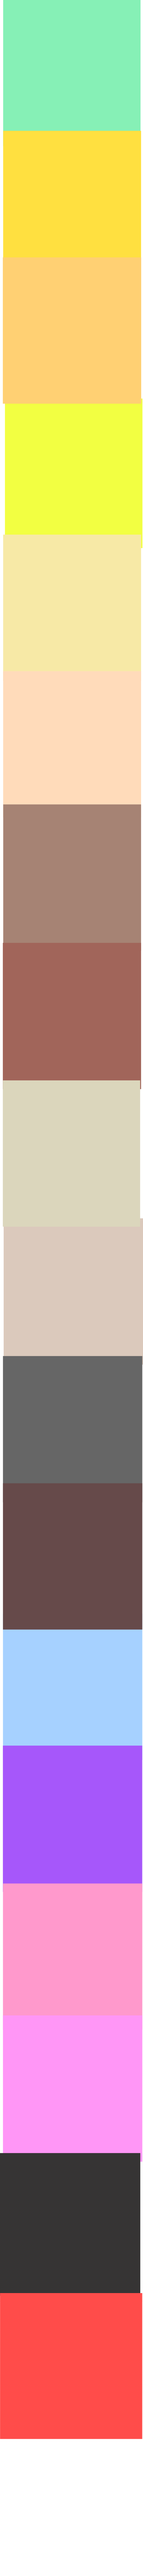

In [28]:
from IPython.display import Image

Image('z_Lithology_legend_gapless2.png', width=15)

In [29]:
liths = [
'Conglomerate', 
'Sandstone',
'Sandstone',
'Sandstone',
'Sandstone',
'Sandstone',
'Siltstone',
'Siltstone',
'Heterolithic',
'Heterolithic',
'Mudstone',
'Mudstone',
'Limestone',
'Dolomite',
'Anhydrite',
'Halite',
'Coal',
'Volcanic',
'NULL',
]

colours = [
None, 
'Grey',
'Red',
'Grey',
'Grey',
'Red',
'Grey',
'Red',
'Grey',
'Red',
'Grey',
'Red',
None, 
None, 
None, 
None, 
None, 
None, 
None, 
]

In [30]:
components = [Component({'lithology': l, 'colour': c}) for l, c in zip(liths, colours)]

In [34]:
Legend.from_image('z_Lithology_legend_gapless2.png', components)

Legend(Decor({'_colour': '#86f0b6', 'component': Component({'lithology': 'Conglomerate'}), 'width': None, 'hatch': None})
Decor({'_colour': '#ffe040', 'component': Component({'lithology': 'Sandstone', 'colour': 'Grey'}), 'width': None, 'hatch': None})
Decor({'_colour': '#ffd073', 'component': Component({'lithology': 'Sandstone', 'colour': 'Red'}), 'width': None, 'hatch': None})
Decor({'_colour': '#f2ff42', 'component': Component({'lithology': 'Sandstone', 'colour': 'Grey'}), 'width': None, 'hatch': None})
Decor({'_colour': '#f7e9a6', 'component': Component({'lithology': 'Sandstone', 'colour': 'Grey'}), 'width': None, 'hatch': None})
Decor({'_colour': '#ffdbba', 'component': Component({'lithology': 'Sandstone', 'colour': 'Red'}), 'width': None, 'hatch': None})
Decor({'_colour': '#a68374', 'component': Component({'lithology': 'Siltstone', 'colour': 'Grey'}), 'width': None, 'hatch': None})
Decor({'_colour': '#a1655a', 'component': Component({'lithology': 'Siltstone', 'colour': 'Red'}), 'width': None, 'hatch': None})
Decor({'_colour': '#dbd6bc', 'component': Component({'lithology': 'Heterolithic', 'colour': 'Grey'}), 'width': None, 'hatch': None})
Decor({'_colour': '#dbc9bc', 'component': Component({'lithology': 'Heterolithic', 'colour': 'Red'}), 'width': None, 'hatch': None})
Decor({'_colour': '#666666', 'component': Component({'lithology': 'Mudstone', 'colour': 'Grey'}), 'width': None, 'hatch': None})
Decor({'_colour': '#664a4a', 'component': Component({'lithology': 'Mudstone', 'colour': 'Red'}), 'width': None, 'hatch': None})
Decor({'_colour': '#a6d1ff', 'component': Component({'lithology': 'Limestone'}), 'width': None, 'hatch': None})
Decor({'_colour': '#a657fa', 'component': Component({'lithology': 'Dolomite'}), 'width': None, 'hatch': None})
Decor({'_colour': '#ff99cc', 'component': Component({'lithology': 'Anhydrite'}), 'width': None, 'hatch': None})
Decor({'_colour': '#ff96f6', 'component': Component({'lithology': 'Halite'}), 'width': None, 'hatch': None})
Decor({'_colour': '#363434', 'component': Component({'lithology': 'Coal'}), 'width': None, 'hatch': None})
Decor({'_colour': '#ff4c4a', 'component': Component({'lithology': 'Volcanic'}), 'width': None, 'hatch': None})
Decor({'_colour': '#ffffff', 'component': Component({'lithology': 'NULL'}), 'width': None, 'hatch': None}))

## Querying a legend

The legend is basically a query table. We can ask the Legend what colour to use for a given Rock object:

In [35]:
legend.get_colour(rock)

'#eeeeee'

In [36]:
rock3 = Component({'colour': 'red',
           'grainsize': 'vf-f',
           'lithology': 'sandstone'})
legend.get_colour(rock3)

'#ffdbba'

In [37]:
Legend.random(rock3)

Legend(Decor({'_colour': '#122e5c', 'component': Component({'colour': 'red', 'grainsize': 'vf-f', 'lithology': 'sandstone'}), 'width': 1.0, 'hatch': None}))

Sometimes we also want to use a width for a given lithology:

In [38]:
legend.get_width(rock3)

3.0

We can also ask the legend which Rock is represented by a particular colour. (I doubt you'd ever really need to do this, but I had to implement this to allow you to make a `Striplog` from an image: it looks up the rocks to use by colour.)

In [39]:
legend.get_component('#f7e9a6')

lithology,sandstone
colour,grey
grainsize,vf-f


The `Legend` behaves more or less like a list, so we can index into it:

In [43]:
legend[3:5]

Legend(Decor({'_colour': '#ff4c4a', 'width': 2.0, 'component': Component({'lithology': 'volcanic'}), 'hatch': None})
Decor({'_colour': '#86f0b6', 'width': 5.0, 'component': Component({'lithology': 'conglomerate'}), 'hatch': None}))

`Legend`s can plot themselves. 

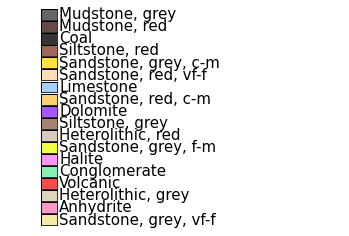

In [44]:
legend.plot()

Sometimes you don't want to have to make a legend, so you can use a random one. Just pass a list of `Component`s...

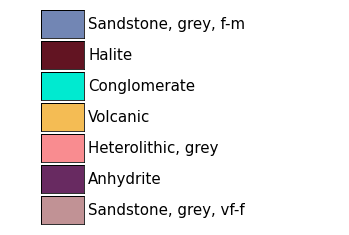

In [45]:
# We'll scrape a quick list of 7 components from the default legend:
c = [d.component for d in legend[:7]]

l = Legend.random(c)
l.plot()

There is a default colour table for geological timescales too... it's based on the Wikipedia's colour scheme for the geological timetable. 

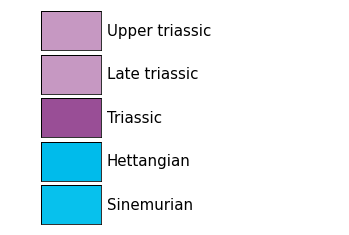

In [46]:
time[74:79].plot(fmt="{age!t}")  # Pass a format for proper case

<hr />

<p style="color:gray">©2022 Agile Geoscience. Licensed CC-BY. <a href="https://github.com/agile-geoscience/striplog">striplog.py</a></p>